In [2]:
import numpy as np 
import cv2 as cv2
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
import numpy as np
import pickle

In [5]:
training_data = np.load("np_data/run_input_training_data.npy")
training_data[:,1]

ValueError: Object arrays cannot be loaded when allow_pickle=False

In [17]:
data = 'data/'
annotations = 'data/annotation/'

In [18]:
def plot_image_given_landmarks(image_file_path, landmarks, colors=['yellow']):
    image = cv2.imread(image_file_path)
    I_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    for i in range(0, len(landmarks-1), 2):
        landmark_x = landmarks[i]
        landmark_y = landmarks[i+1]
        plt.plot(landmark_x, landmark_y, color=colors[0], marker='o',  markersize=1,  linestyle = 'None')
    plt.imshow(I_grayscale)

In [103]:
#path = "C:/Johannes/Dokumente/Studium/ITU/Advanced_Machine_Learning/Project/Run_Results_13_12_21/run_output_numpy_S_hat_matrix.npy"
path = "run_output/run_output_numpy_S_hat_matrix_new.npy"
S_hat_matrix = np.load(path)
landmarks = S_hat_matrix[17*20]


In [104]:
#image_path = data+ "train_1_sub/1629243_1.jpg"
image_path = data+ "train_1_sub/1691766_1.jpg"
image_path

'data/train_1_sub/1691766_1.jpg'

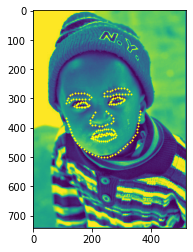

In [105]:
plot_image_given_landmarks(image_path, landmarks)

In [ ]:
def fit_tree():
    # fit tree here
    # decide on node splits
    # random trees 
    # greedly choose best one
    # which minimizes the sum of squared error function
    # return tree
    # tree structure self defined or using library for regression trees? tensorlow?

In [15]:
def get_all_file_names(folder):
    return os.listdir(data+folder)
   

In [ ]:
def face_detection(image):
    grayscale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml') 
    detected_faces = face_cascade.detectMultiScale(grayscale_image, 1.3, 5)
    for (column, row, width, height) in detected_faces:
          cv.rectangle(image,(column, row),(column + width, row + height),(0, 255, 0),4)    
    return cv.cvtColor(image, cv.COLOR_BGR2RGB)
##

In [7]:

# Face detection code JOHANNES 
#
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

img = cv2.imread("data/train_1/1419222657_1.jpg")
x,y,z = (img.shape)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(x//4, y//4))
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
def create_test_triplets():
    
    
    triplets = []
    
    files = get_all_file_names("train_1")
    R = 20
    
    
    for f in files:
        I_path     = f.replace('.jpg', '')
    
        I = cv.imread(data +"train_1/"+I_path+".jpg")
        
        #return face_detection(I)
        
        S_true_x, S_true_y     = get_landmark_coords_from_file(I_path)
    
        np.random.shuffle(files)
        delta_files = files[:R]
        if I_path in delta_files:
            delta_files = delta_files.remove(I_path)
            delta_files.append(files[20])
    
        for d in delta_files:
            S_hat = d.replace(".jpg", '')
            S_hat_x, S_hat_y       = get_landmark_coords_from_file(S_hat)
            S_delta_x              = S_true_x - S_hat_x
            S_delta_y              = S_true_y - S_hat_y
            S_hat                  = np.array(list(zip(S_hat_x, S_hat_y)))
            S_delta                = np.array(list(zip(S_delta_x, S_delta_y)))
        
            triplets.append((I, S_hat, S_delta))
    
    return np.array(triplets)
    
    

In [19]:
img = create_test_triplets()

<ipython-input-18-86f8c413a277>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(triplets)


In [3]:
def read_landmarks_from_file(file):
    landmarks_x = []
    landmarks_y= []
    f = open(file,"r")
    lines = f.readlines()
    for l in lines[1:]:
        coords = l.replace('\n', '').split(", ")
        landmarks_x.append(float(coords[0]))
        landmarks_y.append(float(coords[1])) 
    return (np.array(landmarks_x, dtype=float), np.array(landmarks_y, dtype=float))

In [13]:
def get_landmark_coords_from_file(id_image):
    id_image = id_image.replace(".jpg", "")
    for i in range(1,2331, 1):
        with open(annotations+str(i)+".txt") as f:
            first_line = f.readline().replace('\n','')
            if (first_line == id_image):
                return read_landmarks_from_file(annotations+str(i)+".txt") 
    return None

In [8]:
def plot_image_with_landmarks(id_image):
    img = cv2.imread(data +"train_1/"+id_image)
    x,y = get_landmark_coords_from_file(id_image)
    plt.imshow(img)
    plt.plot(x,y, color='yellow', marker='o',  markersize=1,  linestyle = 'None')

In [36]:
def plot_image_given_coords(id_image, coords):
    image = cv2.imread(data +"train_1/"+id_image)
    coords = list(zip(*coords))
    plt.imshow(image)
    plt.plot(coords[0],coords[1], color='yellow', marker='o',  markersize=1,  linestyle = 'None')

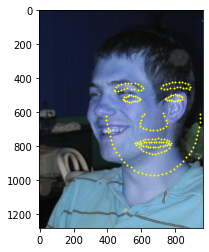

In [37]:
plot_image_given_coords("10697993_1.jpg", compute_mean_shape(img))
#plot_image_with_landmarks("10697993_1.jpg")
#plot_image_with_landmarks("1629243_1")


In [30]:
def compute_mean_shape(images):
    result = np.zeros((194,2))
    for i in range(len(images)):
        shape = images[i][1]
        result = result + shape
    return result / len(images)
        
        

In [ ]:
def fit_regression_tree(r_ik):
    '''
    pesudo code for part b of algorithm 1
    
    '''
    #
    # Tree: - set of node splits 
    #       - leafs containing average r_ik
    #       - points for comparing
    
    #build tree
    #for i in range(depth_tree, current_shape):
   #todo  #   warp_new_coord_sytem()
   #todo  #   a)   type:float theta  = generate_split()
     #   a.1) type: point  = find points_from_image()
     #   
    # go_through_I_and_update_leafs()
    # put r_ik in leafs and average

In [ ]:
def learn_regressor():
    
    '''
    pseudo code for algorithm 1
    
    '''
    
    # type [tuple(float, float) ]: point
    
 #done   #1) type: List[ (List[images], List[points], List[floats]) ]:  create_train_data()
                    #Images        #Shape         #Delta
        
  #todo  #2) type: List[floats]: find_mean_delta_values()
    
    #3) for k in range(num_regression_trees): 
            # for i in (size_training_data):
                    # type: List[floats] r_ik = current_delta_values_of_image_i - accumulative result of k-1 regression trees
                    # fit_tree() based on r_ik
                
    
    #4)        update accumulative result
    
    #5) return accumulative value
    
    

In [ ]:
#
# todo: extract features (choose x amount of pixels based on prior distribution (uniform))
#